In [1]:
!pip install facenet-pytorch


  Obtaining dependency information for facenet-pytorch from https://files.pythonhosted.org/packages/ed/2e/2d56386bc2f834cdc683743903852cf1428b4e5ee119f16cf808b589d3cd/facenet_pytorch-2.6.0-py3-none-any.whl.metadata
  Obtaining dependency information for torch<2.3.0,>=2.2.0 from https://files.pythonhosted.org/packages/5c/01/5ab75f138bf32d7a69df61e4997e24eccad87cc009f5fb7e2a31af8a4036/torch-2.2.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for torchvision<0.18.0,>=0.17.0 from https://files.pythonhosted.org/packages/c6/75/d869f600fc33df8b8ca99943e165a4ca23b73c68dc1942098fde0a6b46f3/torchvision-0.17.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.9 MB 1.1 MB/s eta 0:00:02
   ---------- ----------------------------- 0.5/1.9 MB 5.1 MB/s eta 0:00:01
   --------------------- ------------------ 1.0/1.9 MB 7.2 MB/s eta 0:00:01
   -------------------------------- -

## MTCNN

📸 Processed 000001.jpg | Memory used: 13.36 MB
📸 Processed 000002.jpg | Memory used: 6.64 MB
📸 Processed 000003.jpg | Memory used: 1.14 MB
📸 Processed 000004.jpg | Memory used: 1.25 MB
📸 Processed 000005.jpg | Memory used: 0.55 MB
📸 Processed 000006.jpg | Memory used: 5.57 MB
📸 Processed 000007.jpg | Memory used: 0.55 MB
📸 Processed 000008.jpg | Memory used: 0.79 MB
📸 Processed 000009.jpg | Memory used: -0.07 MB
📸 Processed 000010.jpg | Memory used: 1.19 MB
📸 Processed 000011.jpg | Memory used: 0.18 MB
📸 Processed 000012.jpg | Memory used: -0.06 MB
📸 Processed 000013.jpg | Memory used: 0.25 MB
📸 Processed 000014.jpg | Memory used: 0.27 MB
📸 Processed 000015.jpg | Memory used: 0.35 MB
📸 Processed 000016.jpg | Memory used: 0.21 MB
📸 Processed 000017.jpg | Memory used: 0.23 MB
📸 Processed 000018.jpg | Memory used: 0.47 MB
📸 Processed 000019.jpg | Memory used: 0.47 MB
📸 Processed 000020.jpg | Memory used: 0.44 MB
📸 Processed group.jpg | Memory used: 54.67 MB

✅ Processed 21 images
⏱️ Total

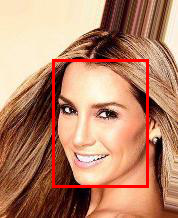

🖼️ 000002.jpg


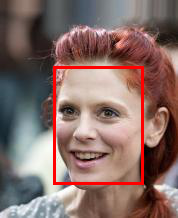

🖼️ 000003.jpg


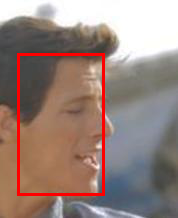

🖼️ 000004.jpg


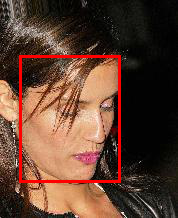

🖼️ 000005.jpg


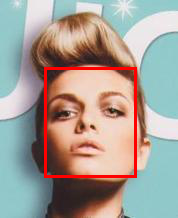

🖼️ 000006.jpg


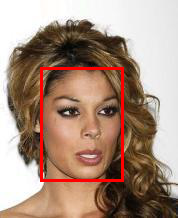

🖼️ 000007.jpg


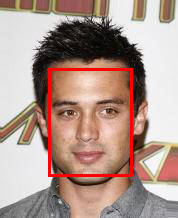

🖼️ 000008.jpg


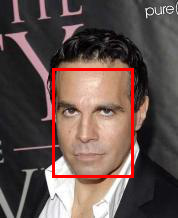

🖼️ 000009.jpg


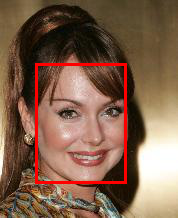

🖼️ 000010.jpg


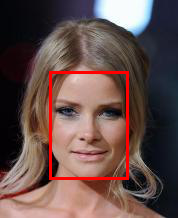

🖼️ 000011.jpg


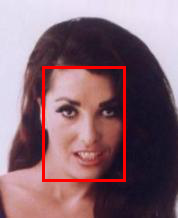

🖼️ 000012.jpg


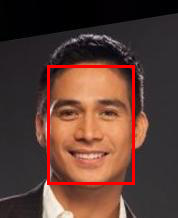

🖼️ 000013.jpg


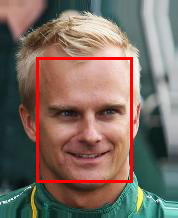

🖼️ 000014.jpg


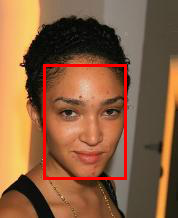

🖼️ 000015.jpg


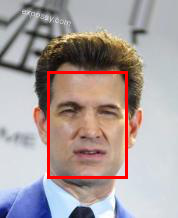

🖼️ 000016.jpg


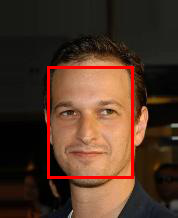

🖼️ 000017.jpg


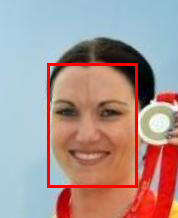

🖼️ 000018.jpg


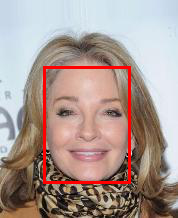

🖼️ 000019.jpg


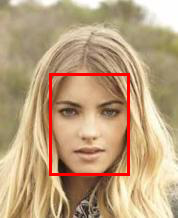

🖼️ 000020.jpg


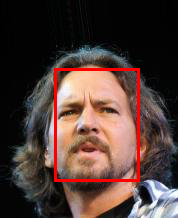

🖼️ group.jpg


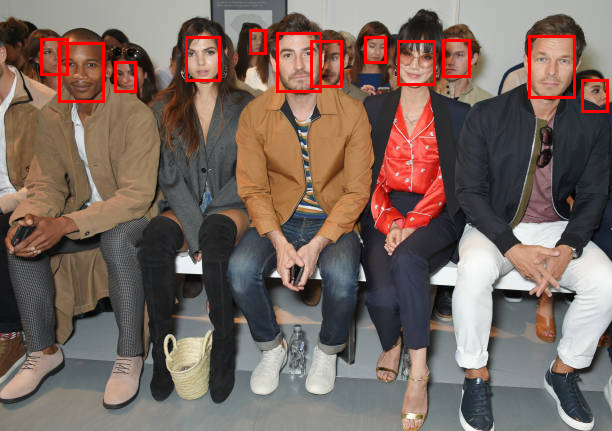

In [19]:
import os
import cv2
import numpy as np
from PIL import Image, ImageDraw
import torch
from facenet_pytorch import MTCNN
import time
import psutil
from IPython.display import display

# Path to the folder containing images
image_folder = 'image'

# Get all image files (common formats)
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
if not image_files:
    raise Exception("No image files found in 'images' folder!")

# Initialize MTCNN
device = 'cuda' if torch.cuda.is_available() else 'cpu'
mtcnn = MTCNN(keep_all=True, device=device)

# Start timer
start_time = time.time()
mem_usages = []
results = []

# Process images
for image_name in image_files:
    image_path = os.path.join(image_folder, image_name)

    # Measure memory before
    mem_before = psutil.Process().memory_info().rss / (1024 ** 2)  # in MB

    # Load and prepare image
    img = Image.open(image_path).convert('RGB')

    # Detect faces
    boxes, _ = mtcnn.detect(img)

    # Draw rectangles
    draw = ImageDraw.Draw(img)
    if boxes is not None:
        for box in boxes:
            draw.rectangle(box.tolist(), outline=(255, 0, 0), width=3)

    results.append((image_name, img))

    # Measure memory after
    mem_after = psutil.Process().memory_info().rss / (1024 ** 2)
    mem_diff = mem_after - mem_before
    mem_usages.append(mem_diff)

    print(f"📸 Processed {image_name} | Memory used: {mem_diff:.2f} MB")

# End timer
end_time = time.time()
total_time = end_time - start_time
average_time = total_time / len(results)
average_memory = sum(mem_usages) / len(mem_usages)

# Output summary
print(f"\n✅ Processed {len(results)} images")
print(f"⏱️ Total time: {total_time:.2f} s | Average time/image: {average_time:.2f} s")
print(f"🧠 Average memory used per image: {average_memory:.2f} MB")

# Display results
for name, img in results:
    print(f"🖼️ {name}")
    display(img)


## Haar cascade

📸 000001.jpg | Memory used: 12.91 MB
📸 000002.jpg | Memory used: 0.00 MB
📸 000003.jpg | Memory used: 0.00 MB
📸 000004.jpg | Memory used: 0.26 MB
📸 000005.jpg | Memory used: 0.00 MB
📸 000006.jpg | Memory used: 0.21 MB
📸 000007.jpg | Memory used: 0.19 MB
📸 000008.jpg | Memory used: 0.11 MB
📸 000009.jpg | Memory used: 0.09 MB
📸 000010.jpg | Memory used: 0.30 MB
📸 000011.jpg | Memory used: 0.00 MB
📸 000012.jpg | Memory used: 0.15 MB
📸 000013.jpg | Memory used: 0.26 MB
📸 000014.jpg | Memory used: 0.00 MB
📸 000015.jpg | Memory used: 0.26 MB
📸 000016.jpg | Memory used: 0.09 MB
📸 000017.jpg | Memory used: 0.14 MB
📸 000018.jpg | Memory used: 0.15 MB
📸 000019.jpg | Memory used: 0.15 MB
📸 000020.jpg | Memory used: 0.15 MB

✅ Processed 20 images with Haar Cascade in 0.60 seconds.
⏱️ Average time per image: 0.03 seconds.
🧠 Average memory used per image: 0.77 MB

🖼️ 000001.jpg


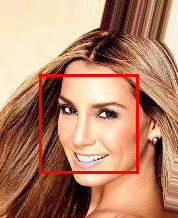

🖼️ 000002.jpg


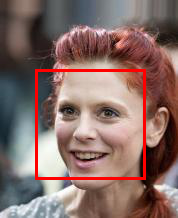

🖼️ 000003.jpg


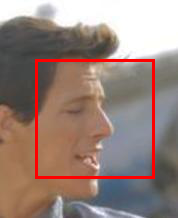

🖼️ 000004.jpg


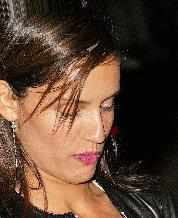

🖼️ 000005.jpg


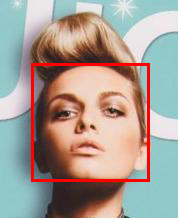

🖼️ 000006.jpg


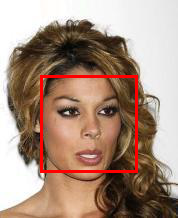

🖼️ 000007.jpg


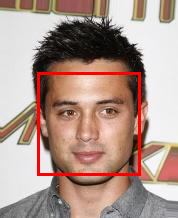

🖼️ 000008.jpg


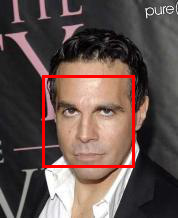

🖼️ 000009.jpg


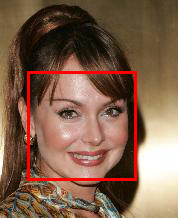

🖼️ 000010.jpg


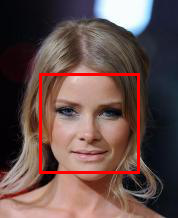

🖼️ 000011.jpg


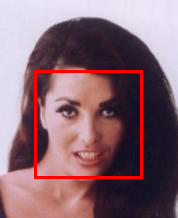

🖼️ 000012.jpg


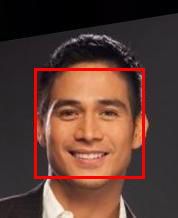

🖼️ 000013.jpg


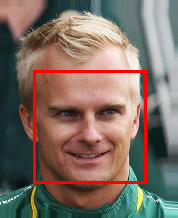

🖼️ 000014.jpg


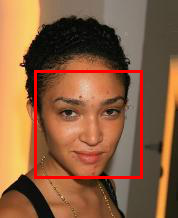

🖼️ 000015.jpg


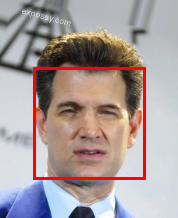

🖼️ 000016.jpg


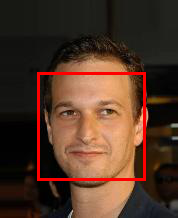

🖼️ 000017.jpg


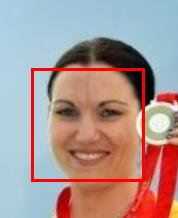

🖼️ 000018.jpg


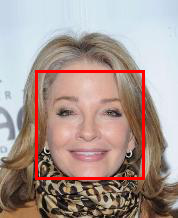

🖼️ 000019.jpg


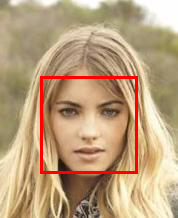

🖼️ 000020.jpg


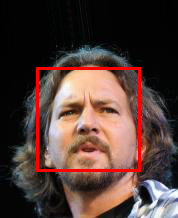

In [6]:
import os
import cv2
import numpy as np
from PIL import Image, ImageDraw
import time
import psutil
from IPython.display import display

# Path to the folder containing images
image_folder = 'image'

# Load all image filenames
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
if not image_files:
    raise Exception("No images found in the 'images' folder!")

# Load Haar Cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Start time and memory tracking
start_time = time.time()
mem_usages = []
results = []

# Process each image
for image_name in image_files:
    image_path = os.path.join(image_folder, image_name)

    # Measure memory before
    mem_before = psutil.Process().memory_info().rss / (1024 ** 2)

    # Load image
    img_pil = Image.open(image_path).convert('RGB')
    img_np = np.array(img_pil)
    img_bgr = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)

    # Convert to grayscale
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

    # Draw rectangles
    draw = ImageDraw.Draw(img_pil)
    for (x, y, w, h) in faces:
        draw.rectangle([(x, y), (x + w, y + h)], outline=(255, 0, 0), width=3)

    results.append((image_name, img_pil))

    # Measure memory after
    mem_after = psutil.Process().memory_info().rss / (1024 ** 2)
    mem_diff = mem_after - mem_before
    mem_usages.append(mem_diff)

    print(f"📸 {image_name} | Memory used: {mem_diff:.2f} MB")

# End time
end_time = time.time()
total_time = end_time - start_time
average_time = total_time / len(results)
average_memory = sum(mem_usages) / len(mem_usages)

# Output summary
print(f"\n✅ Processed {len(results)} images with Haar Cascade in {total_time:.2f} seconds.")
print(f"⏱️ Average time per image: {average_time:.2f} seconds.")
print(f"🧠 Average memory used per image: {average_memory:.2f} MB\n")

# Display results
for name, img in results:
    print(f"🖼️ {name}")
    display(img)


📸 000001.jpg | Memory used: 2.99 MB
📸 000002.jpg | Memory used: 0.14 MB
📸 000003.jpg | Memory used: 0.00 MB
📸 000004.jpg | Memory used: 0.00 MB
📸 000005.jpg | Memory used: 0.14 MB
📸 000006.jpg | Memory used: 0.00 MB
📸 000007.jpg | Memory used: 0.25 MB
📸 000008.jpg | Memory used: 0.00 MB
📸 000009.jpg | Memory used: 0.00 MB
📸 000010.jpg | Memory used: 0.00 MB
📸 000011.jpg | Memory used: 0.00 MB
📸 000012.jpg | Memory used: 0.00 MB
📸 000013.jpg | Memory used: 0.00 MB
📸 000014.jpg | Memory used: 0.00 MB
📸 000015.jpg | Memory used: 0.00 MB
📸 000016.jpg | Memory used: 0.00 MB
📸 000017.jpg | Memory used: 0.00 MB
📸 000018.jpg | Memory used: 0.00 MB
📸 000019.jpg | Memory used: 0.00 MB
📸 000020.jpg | Memory used: 0.00 MB
📸 group.jpg | Memory used: 14.31 MB

✅ Processed 21 images with OpenCV Haar Cascade in 2.32 seconds.
⏱️ Average time per image: 0.11 seconds.
🧠 Average memory used per image: 0.85 MB

🖼️ 000001.jpg


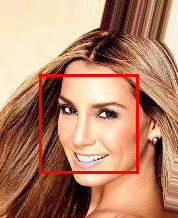

🖼️ 000002.jpg


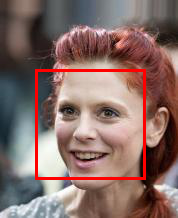

🖼️ 000003.jpg


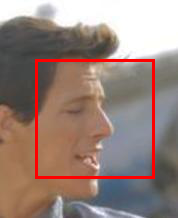

🖼️ 000004.jpg


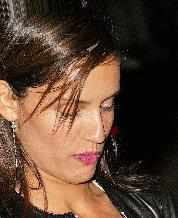

🖼️ 000005.jpg


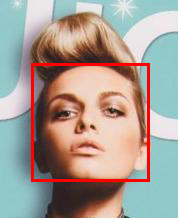

🖼️ 000006.jpg


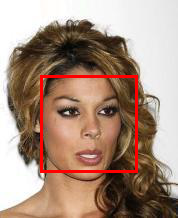

🖼️ 000007.jpg


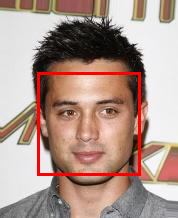

🖼️ 000008.jpg


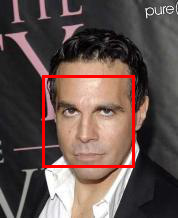

🖼️ 000009.jpg


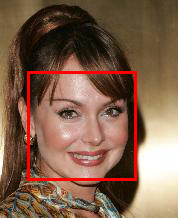

🖼️ 000010.jpg


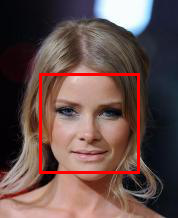

🖼️ 000011.jpg


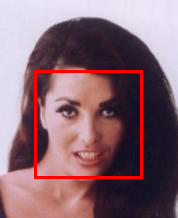

🖼️ 000012.jpg


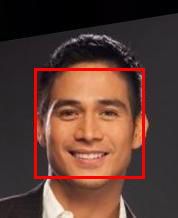

🖼️ 000013.jpg


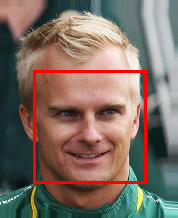

🖼️ 000014.jpg


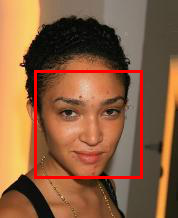

🖼️ 000015.jpg


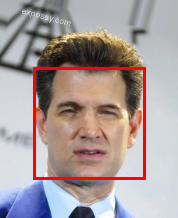

🖼️ 000016.jpg


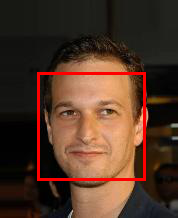

🖼️ 000017.jpg


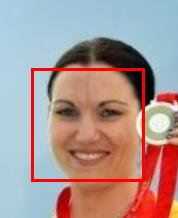

🖼️ 000018.jpg


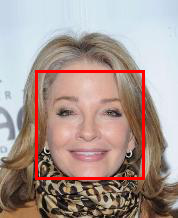

🖼️ 000019.jpg


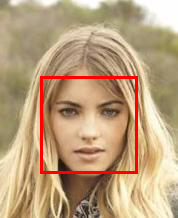

🖼️ 000020.jpg


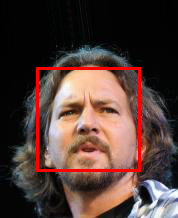

🖼️ group.jpg


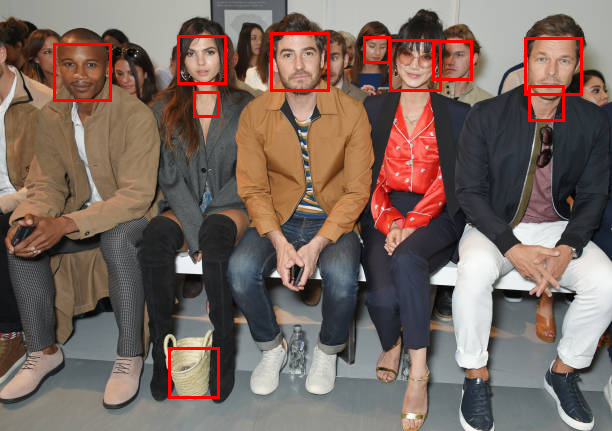

In [21]:
import os
import cv2
import numpy as np
from PIL import Image, ImageDraw
import time
import psutil
from IPython.display import display

# Path to the folder containing images
image_folder = 'image'

# Load all image filenames
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
if not image_files:
    raise Exception("No images found in the 'images' folder!")

# Load OpenCV Haar Cascade model for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Start time and memory tracking
start_time = time.time()
mem_usages = []
results = []

# Process each image
for image_name in image_files:
    image_path = os.path.join(image_folder, image_name)

    # Measure memory before processing
    mem_before = psutil.Process().memory_info().rss / (1024 ** 2)

    # Load image
    img_pil = Image.open(image_path).convert('RGB')
    img_np = np.array(img_pil)
    img_bgr = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)

    # Convert to grayscale
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

    # Draw rectangles around detected faces
    draw = ImageDraw.Draw(img_pil)
    for (x, y, w, h) in faces:
        draw.rectangle([(x, y), (x + w, y + h)], outline=(255, 0, 0), width=3)

    results.append((image_name, img_pil))

    # Measure memory after processing
    mem_after = psutil.Process().memory_info().rss / (1024 ** 2)
    mem_diff = mem_after - mem_before
    mem_usages.append(mem_diff)

    print(f"📸 {image_name} | Memory used: {mem_diff:.2f} MB")

# End time
end_time = time.time()
total_time = end_time - start_time
average_time = total_time / len(results)
average_memory = sum(mem_usages) / len(mem_usages)

# Output summary
print(f"\n✅ Processed {len(results)} images with OpenCV Haar Cascade in {total_time:.2f} seconds.")
print(f"⏱️ Average time per image: {average_time:.2f} seconds.")
print(f"🧠 Average memory used per image: {average_memory:.2f} MB\n")

# Display the processed images
for name, img in results:
    print(f"🖼️ {name}")
    display(img)


In [33]:
import os
import numpy as np
from PIL import Image, ImageDraw
import time
import psutil
from insightface.app import FaceAnalysis
from IPython.display import display

# Set image folder
image_folder = 'image'

# Get image filenames
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
if not image_files:
    raise Exception("No image files found in 'image' folder!")

# Initialize ArcFace via InsightFace
app = FaceAnalysis(name='buffalo_l')  # buffalo_l includes both RetinaFace & ArcFace
ctx_id = 0 if cv2.cuda.getCudaEnabledDeviceCount() > 0 else -1
app.prepare(ctx_id=ctx_id)

# Timer and memory
start_time = time.time()
mem_usages = []
results = []

# Process each image
for image_name in image_files:
    image_path = os.path.join(image_folder, image_name)

    # Measure memory before
    mem_before = psutil.Process().memory_info().rss / (1024 ** 2)

    # Load image
    img_pil = Image.open(image_path).convert('RGB')
    img_np = np.array(img_pil)

    # Detect faces
    faces = app.get(img_np)

    # Draw bounding boxes
    draw = ImageDraw.Draw(img_pil)
    for face in faces:
        box = face.bbox.astype(int)
        draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline=(0, 255, 0), width=3)

    results.append((image_name, img_pil))

    # Measure memory after
    mem_after = psutil.Process().memory_info().rss / (1024 ** 2)
    mem_usages.append(mem_after - mem_before)

    print(f"📸 Processed {image_name} | Memory used: {mem_after - mem_before:.2f} MB")

# Timer stats
end_time = time.time()
total_time = end_time - start_time
avg_time = total_time / len(results)
avg_memory = sum(mem_usages) / len(mem_usages)

# Final summary
print(f"\n✅ Processed {len(results)} images with ArcFace (InsightFace)")
print(f"⏱️ Total time: {total_time:.2f} s | Avg time/image: {avg_time:.2f} s")
print(f"🧠 Avg memory/image: {avg_memory:.2f} MB")

# Display results
for name, img in results:
    print(f"🖼️ {name}")
    display(img)


ModuleNotFoundError: No module named 'insightface'

In [30]:
%pip install insightface onnxruntime

  Using cached insightface-0.7.3.tar.gz (439 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Obtaining dependency information for onnx from https://files.pythonhosted.org/packages/51/a5/19b0dfcb567b62e7adf1a21b08b23224f0c2d13842aee4d0abc6f07f9cf5/onnx-1.17.0-cp311-cp311-win_amd64.whl.metadata
  Using cached onnx-1.17.0-cp311-cp311-win_amd64.whl.metadata (16 kB)
  Obtaining dependency information for easydict from https://files.pythonhosted.org/packages/05/ec/fa6963f1198172c2b75c9ab6ecefb3045991f92f75f5eb41b6621b198123/easydict-1.13-py3-none-any.whl.metadata
  Using cached easydict-1.13-py3-none-any.whl.metadata (4.2 kB)
  Obtaining dependency information for cython from https://files.pythonhosted.org/pa

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [213 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build\lib.win-amd64-cpython-311\insightface
  copying insightface\__init__.py -> build\lib.win-amd64-cpython-311\insightface
  creating build\lib.win-amd64-cpython-311\insightface\app
  copying insightface\app\common.py -> build\lib.win-amd64-cpython-311\insightface\app
  copying insightface\app\face_analysis.py -> build\lib.win-amd64-cpython-311\insightface\app
  copying insightface\app\mask_renderer.py -> build\lib.win-amd64-cpython-311\insightface\app
  copying insightface\app\__init__.py -> build\lib.win-amd64-cpython-311\insightface\app
  creating build\lib.win-amd64-cpython-311\insightface\commands
  copying insightface\commands\insightface_cli.py -> build\lib.win-amd64-cpython-311\insightface\commands
  copying insightface\commands\model_download.py -> build\lib.win-amd64-cpython-311\insightface\commands
  copying insightface\comm

In [32]:
%pip install --upgrade pip
%pip install insightface onnxruntime


  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/29/a2/d40fb2460e883eca5199c62cfc2463fd261f760556ae6290f88488c362c0/pip-25.1.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 660.6 kB/s eta 0:00:03
   --- ------------------------------------ 0.2/1.8 MB 1.5 MB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.8 MB 2.4 MB/s eta 0:00:01
   ------------- -------------------------- 0.6/1.8 MB 3.5 MB/s eta 0:00:01
   -------------- ------------------------- 0.7/1.8 MB 3.6 MB/s eta 0:00:01
   -------------------- ------------------- 0.9/1.8 MB 3.7 MB/s eta 0:00:01
   ------------------------------- -------- 1.4/1.8 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 5.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation:

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [213 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build\lib.win-amd64-cpython-311\insightface
  copying insightface\__init__.py -> build\lib.win-amd64-cpython-311\insightface
  creating build\lib.win-amd64-cpython-311\insightface\app
  copying insightface\app\common.py -> build\lib.win-amd64-cpython-311\insightface\app
  copying insightface\app\face_analysis.py -> build\lib.win-amd64-cpython-311\insightface\app
  copying insightface\app\mask_renderer.py -> build\lib.win-amd64-cpython-311\insightface\app
  copying insightface\app\__init__.py -> build\lib.win-amd64-cpython-311\insightface\app
  creating build\lib.win-amd64-cpython-311\insightface\commands
  copying insightface\commands\insightface_cli.py -> build\lib.win-amd64-cpython-311\insightface\commands
  copying insightface\commands\model_download.py -> build\lib.win-amd64-cpython-311\insightface\commands
  copying insightface\comm